In [206]:
import pandas as pd
import matplotlib.pyplot as plt

In [207]:
data={
    'city':['kathmandu','pokhara','lalitpur'],
    'population':[1000000,500000,300000]
}
df=pd.DataFrame(data)
# print(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        3 non-null      object
 1   population  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes
None


In [208]:
df.describe()
df.memory_usage(index=True,deep=False)

Index         132
city           24
population     24
dtype: int64

<Axes: xlabel='city'>

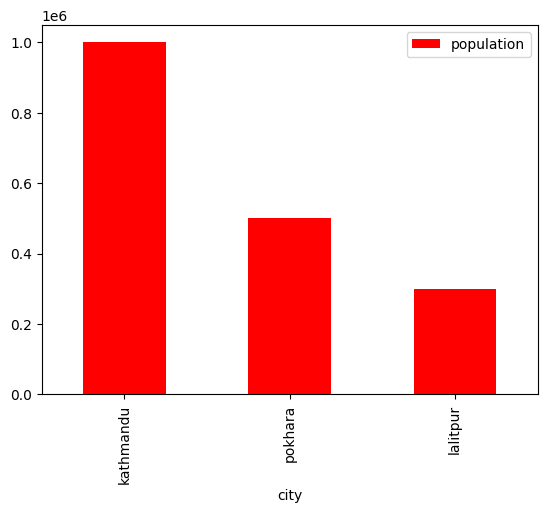

In [209]:

df.plot.bar(x='city',y='population',color='red')

<Axes: ylabel='population'>

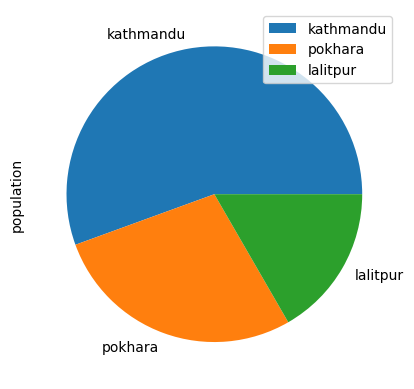

In [210]:
df.plot.pie(y='population',labels=df['city'])

In [211]:
df_students=pd.DataFrame({
    'studentID':[1,2,3],
    'Name':['Ram','Sitaa','Hari']
})
df_marks=pd.DataFrame({
    'studentID':[1,2,4],
    'Marks':['89','09','89']
})
print(df_students)
print("----------------------------")
print(df_marks)


   studentID   Name
0          1    Ram
1          2  Sitaa
2          3   Hari
----------------------------
   studentID Marks
0          1    89
1          2    09
2          4    89


In [212]:
merged_inner=pd.merge(df_students,df_marks,on='studentID',how='inner')
print(merged_inner)

   studentID   Name Marks
0          1    Ram    89
1          2  Sitaa    09


In [213]:
merged_outer=pd.merge(df_students,df_marks,on='studentID',how='outer')
merged_left=pd.merge(df_students,df_marks,on='studentID',how='left')
merged_right=pd.merge(df_students,df_marks,on='studentID',how='right')
print(merged_right)
print(merged_left)
print(merged_outer)


   studentID   Name Marks
0          1    Ram    89
1          2  Sitaa    09
2          4    NaN    89
   studentID   Name Marks
0          1    Ram    89
1          2  Sitaa    09
2          3   Hari   NaN
   studentID   Name Marks
0          1    Ram    89
1          2  Sitaa    09
2          3   Hari   NaN
3          4    NaN    89


In [214]:
df_A=pd.DataFrame({
    'temperature':[20,22,24]
},index=['day1','day2','day3'])
df_B=pd.DataFrame({
    'humidity':[60,65,70]
},index=['01','02','03'])
merged_outer=df_A.join(df_B,how='outer')
merged_inner=df_A.join(df_B,how='inner')
merged_left=df_A.join(df_B,how='left')
merged_right=df_A.join(df_B,how='right')
print(merged_right)
print(merged_left)
print(merged_outer)
print(merged_inner)

    temperature  humidity
01          NaN        60
02          NaN        65
03          NaN        70
      temperature  humidity
day1           20       NaN
day2           22       NaN
day3           24       NaN
      temperature  humidity
01            NaN      60.0
02            NaN      65.0
03            NaN      70.0
day1         20.0       NaN
day2         22.0       NaN
day3         24.0       NaN
Empty DataFrame
Columns: [temperature, humidity]
Index: []


In [215]:
df_wide=pd.DataFrame({
    'Name':['Ram','sita'],
    'Maths':[60,70],
    'Science':[82,84]
})
print(df_wide)

   Name  Maths  Science
0   Ram     60       82
1  sita     70       84


In [216]:
df_long=pd.melt(
    df_wide,id_vars=['Name'],
    var_name='subjects',
    value_name='score'
)
print(df_long)

   Name subjects  score
0   Ram    Maths     60
1  sita    Maths     70
2   Ram  Science     82
3  sita  Science     84


In [217]:
df_original=df_long.pivot(
    index='Name',
    columns='subjects',
    values='score'
)
print(df_original)

subjects  Maths  Science
Name                    
Ram          60       82
sita         70       84


In [218]:
df_stacked=df_long.stack()
print(df_stacked)

0  Name            Ram
   subjects      Maths
   score            60
1  Name           sita
   subjects      Maths
   score            70
2  Name            Ram
   subjects    Science
   score            82
3  Name           sita
   subjects    Science
   score            84
dtype: object


In [219]:
df=pd.read_csv('data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Roll     5 non-null      int64  
 1   Name     4 non-null      object 
 2   Address  3 non-null      object 
 3   Age      4 non-null      float64
 4   Gender   2 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 332.0+ bytes
None


check for missing value

In [220]:
# df.isnull()
# df.isna() #same as above
print(df.isna().sum())

Roll       0
Name       1
Address    2
Age        1
Gender     3
dtype: int64


In [221]:
#drop rows with any mising value
new_df=df.dropna()
# new_df=df.dropna(axis=1)

new_df

,Roll,Name,Address,Age,Gender
4,5,aakash,dharan,23.0,male


In [222]:
df["Address"]=df['Address'].fillna("unknown")
df

,Roll,Name,Address,Age,Gender
0,1,ram,biratnagar,NaN,NaN
1,2,shyam,unknown,22.0,NaN
2,3,NaN,dharan,25.0,female
3,4,gopal,unknown,21.0,NaN
4,5,aakash,dharan,23.0,male


In [223]:
df["Age"]=df['Age'].fillna(df['Age'].mean)
print(df)


   Roll    Name     Address  \
0     1     ram  biratnagar   
1     2   shyam     unknown   
2     3     NaN      dharan   
3     4   gopal     unknown   
4     5  aakash      dharan   

                                                 Age  Gender  
0  <bound method Series.mean of 0     NaN\n1    2...     NaN  
1                                               22.0     NaN  
2                                               25.0  female  
3                                               21.0     NaN  
4                                               23.0    male  
